In [3]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

#Upload dataset
input_files = 'spotify_history.csv'
df = pd.read_csv(input_files)

#Tampilkan 5 baris pertama
df.head()

<ipython-input-3-a857a0512d6f>:11: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_files)


,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [4]:
#Cek Struktur Data

#info dataset
df.info()

#cek apakah ada data yang hilang
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67275 entries, 0 to 67274
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   spotify_track_uri  67275 non-null  object
 1   ts                 67275 non-null  object
 2   platform           67275 non-null  object
 3   ms_played          67275 non-null  int64 
 4   track_name         67275 non-null  object
 5   artist_name        67274 non-null  object
 6   album_name         67274 non-null  object
 7   reason_start       67131 non-null  object
 8   reason_end         67157 non-null  object
 9   shuffle            67274 non-null  object
 10  skipped            67274 non-null  object
dtypes: int64(1), object(10)
memory usage: 5.6+ MB


,0
spotify_track_uri,0
ts,0
platform,0
ms_played,0
track_name,0
artist_name,1
album_name,1
reason_start,144
reason_end,118
shuffle,1


In [9]:
#cek nilai terbanyak
most_common_artist = df['artist_name'].mode()[0]
most_common_album = df['album_name'].mode()[0]
most_common_start = df["reason_start"].mode()[0]
most_common_end = df["reason_end"].mode()[0]
most_common_shuffle = df["shuffle"].mode()[0]
most_common_skipped = df["skipped"].mode()[0]

print("Nilai terbanyak pada kolom 'artist_name':", most_common_artist)
print("Nilai terbanyak pada kolom 'album_name':", most_common_album)
print("Nilai terbanyak pada kolom 'reason_start':", most_common_start)
print("Nilai terbanyak pada kolom 'reason_end':", most_common_end)
print("Nilai terbanyak pada kolom 'shuffle':", most_common_shuffle)
print("Nilai terbanyak pada kolom 'skipped':", most_common_skipped)

Nilai terbanyak pada kolom 'artist_name': The Beatles
Nilai terbanyak pada kolom 'album_name': The Beatles
Nilai terbanyak pada kolom 'reason_start': fwdbtn
Nilai terbanyak pada kolom 'reason_end': fwdbtn
Nilai terbanyak pada kolom 'shuffle': True
Nilai terbanyak pada kolom 'skipped': False


In [10]:
df["artist_name"].fillna(most_common_artist, inplace=True)
df["album_name"].fillna(most_common_album, inplace=True)
df["reason_start"].fillna(most_common_start, inplace=True)
df["reason_end"].fillna(most_common_end, inplace=True)
df["shuffle"].fillna(most_common_shuffle, inplace=True)
df["skipped"].fillna(most_common_skipped, inplace=True)

<ipython-input-10-f976bd8be8bc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["artist_name"].fillna(most_common_artist, inplace=True)
<ipython-input-10-f976bd8be8bc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [11]:
df.isnull().sum()

,0
spotify_track_uri,0
ts,0
platform,0
ms_played,0
track_name,0
artist_name,0
album_name,0
reason_start,0
reason_end,0
shuffle,0


In [32]:
df["ts"] = pd.to_datetime(df["ts"])
df["year"] = df["ts"].dt.year
df["month"] = df["ts"].dt.month
df["day"] = df["ts"].dt.day
df["hour"] = df["ts"].dt.hour

In [33]:
df["duration_hours"] = df["ms_played"] / (1000 * 60 * 60)

song_counts = df["track_name"].value_counts().reset_index()
song_counts.columns = ["track_name", "play_count"]
df.to_csv("spotify_cleaned.csv", index=False)

In [34]:
#Eksplorasi awal data
input_file = "spotify_cleaned.csv"
df = pd.read_csv(input_file)

#statistik dasar untuk kolom numerik
df.describe()

,ms_played,year,month,day,hour,duration_hours
count,6.727500e+04,67275.000000,67275.000000,67275.000000,67275.000000,67275.000000
mean,1.036935e+05,2017.552568,7.259012,14.865492,11.851312,0.028804
std,1.121849e+05,1.161952,3.307626,8.773699,8.095813,0.031162
min,0.000000e+00,2013.000000,1.000000,1.000000,0.000000,0.000000
25%,2.387000e+03,2017.000000,5.000000,7.000000,4.000000,0.000663
50%,5.625800e+04,2017.000000,8.000000,14.000000,13.000000,0.015627
75%,1.960235e+05,2018.000000,10.000000,22.000000,20.000000,0.054451
max,1.319375e+06,2020.000000,12.000000,31.000000,23.000000,0.366493


In [35]:
#cek jumlah track unik yang pernah diputar
df['track_name'].nunique()

6923

In [36]:
#cek jumlah artis unik yang pernah diputar
df['artist_name'].nunique()

1504

In [37]:
#Top 10 lagu yang paling sering diputar
df['track_name'].value_counts().head(10)

,count
track_name,
Married with Children - 2014 Remaster,100
In the Blood,85
Come Together - Remastered 2009,78
The River,77
Yesterday - Remastered 2009,76
Paloma Querida,73
Little Wing,72
Barcelona,72
The Way You Look Tonight,72


**Top Artist Tahun ini vs Tahun Lalu**

In [38]:
#Konversi ts ke Datetime
df['ts'] = pd.to_datetime(df['ts'])

#Tambahkan kolom tahun & bulan untuk analisis
df['year'] = df['ts'].dt.year
df['month'] = df['ts'].dt.month

#Cek apakah konversi berhasil
df[['ts','year', 'month']].head()

,ts,year,month
0,2013-07-08 02:44:34,2013,7
1,2013-07-08 02:45:37,2013,7
2,2013-07-08 02:50:24,2013,7
3,2013-07-08 02:52:40,2013,7
4,2013-07-08 03:17:52,2013,7


In [39]:
#Ganti angka tahun sesuai dataset. Karna di dataset tahunnya 2013-2015, maka:
tahun_ini = 2015 #tahun terbaru
tahun_lalu = 2014 #tahun sebelumnya

df_tahun_ini = df[df['year'] == tahun_ini]
df_tahun_lalu = df[df['year'] == tahun_lalu]

#Cek jumlah data per tahun
print(f"Jumlah data tahun {tahun_ini}: {len(df_tahun_ini)}")
print(f"Jumlah data tahun {tahun_lalu}: {len(df_tahun_lalu)}")
print("Jumlah data tahun 2013:", len(df[df['year'] == 2013]))

Jumlah data tahun 2015: 2809
Jumlah data tahun 2014: 23
Jumlah data tahun 2013: 185


**Top Artist di 2015**

In [40]:
#Hitung jumlah pemutaran per artis di 2015
top_artis_2015 = df_tahun_ini['artist_name'].value_counts().head(10)

#Tampilkan hasil
print("Top 10 Artis di 2015:")
print(top_artis_2015)

Top 10 Artis di 2015:
artist_name
The Script            123
The Rolling Stones    100
David Bisbal           94
Justin Bieber          78
We The Kings           57
Frank Sinatra          57
AWOLNATION             48
Jimi Hendrix           42
Hozier                 39
Fall Out Boy           39
Name: count, dtype: int64


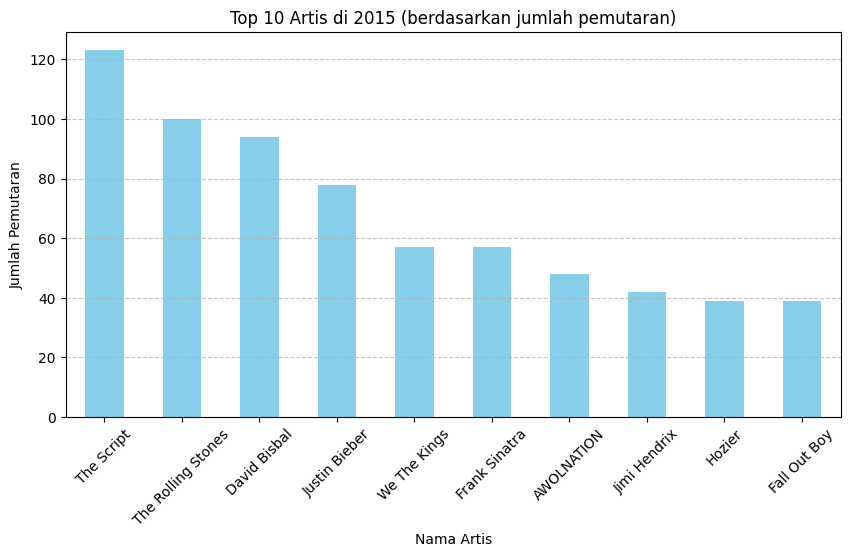

In [41]:
#Visualisasi
import matplotlib.pyplot as plt

#Plot bar chart
plt.figure(figsize=(10,5))
top_artis_2015.plot(kind='bar', color='skyblue')

#Tambahkan judul & label
plt.title('Top 10 Artis di 2015 (berdasarkan jumlah pemutaran)')
plt.xlabel('Nama Artis')
plt.ylabel('Jumlah Pemutaran')
plt.xticks(rotation=45) #label diputar agar mudah dibaca
plt.grid(axis="y", linestyle="--", alpha=0.7)

#Tampilkan plot
plt.show()

**Top 10 Lagu di 2015**

In [42]:
# Hitung jumlah pemutaran per lagu di 2015
top_lagu_2015 = df_tahun_ini['track_name'].value_counts().head(10)

# Tampilkan hasil
print("Top 10 Lagu di 2015:")
print(top_lagu_2015)

Top 10 Lagu di 2015:
track_name
Paraíso                                              33
What Do You Mean?                                    32
Diez Mil Maneras                                     28
Superheroes                                          24
Switzerland                                          23
Old Thing Back (feat. Ja Rule and Ralph Tresvant)    22
Photograph                                           20
Drag Me Down                                         20
La Buena y la Mala                                   18
Sun Is Shining                                       18
Name: count, dtype: int64


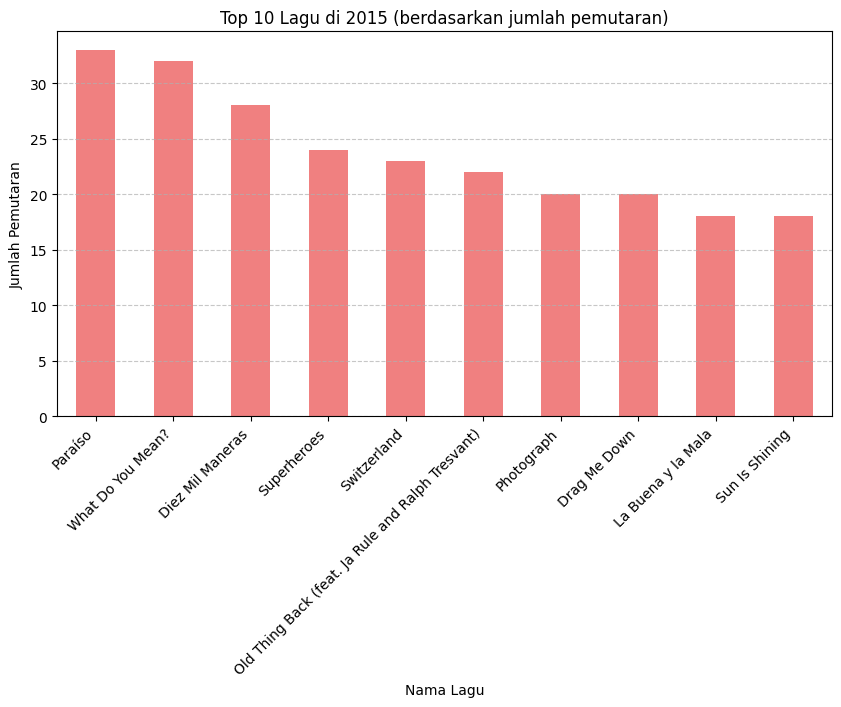

In [43]:
#Visualisasi
import matplotlib.pyplot as plt

#Plot bar chart
plt.figure(figsize=(10,5))
top_lagu_2015.plot(kind='bar', color='lightcoral')

#Tambahkan judul & label
plt.title('Top 10 Lagu di 2015 (berdasarkan jumlah pemutaran)')
plt.xlabel('Nama Lagu')
plt.ylabel('Jumlah Pemutaran')
plt.xticks(rotation=45, ha='right') #label diputar agar mudah dibaca
plt.grid(axis="y", linestyle="--", alpha=0.7)

#Tampilkan grafik
plt.show()

**Analisis Skip Rate di 2015**

In [44]:
#Hitung jumlah total pemutaran dan jummlah lagu yang di-skip
total_play = df_tahun_ini.shape[0]
total_skip = df_tahun_ini[df_tahun_ini['skipped'] == True].shape[0]

#Hitung persentase skip
skip_rate = (total_skip / total_play) * 100

#Tampilkan hasil
print(f"Jumlah total pemutaran: {total_play}")
print(f"Jumlah total skip: {total_skip}")
print(f"Persentase skip: {skip_rate:.2f}%")

Jumlah total pemutaran: 2809
Jumlah total skip: 2212
Persentase skip: 78.75%


78.75% lagu di skip--berarti sebagian besar lagu hanya diputar **sebentar** sebelum dilewati ,berarti bisa jadi:
*   Pengguna banyak mencari lagu baru tapi cepat melewatkannya
*   Mereka hanya ingin mendengar bagian tertentu dari lagu (misal intro/chorus)
*   Algoritma shuffle yang tidak sesuai dengan preferensi





<ipython-input-45-283660c69d5c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Status', y='Jumlah', data=skip_data, palette=['lightblue', 'salmon'])


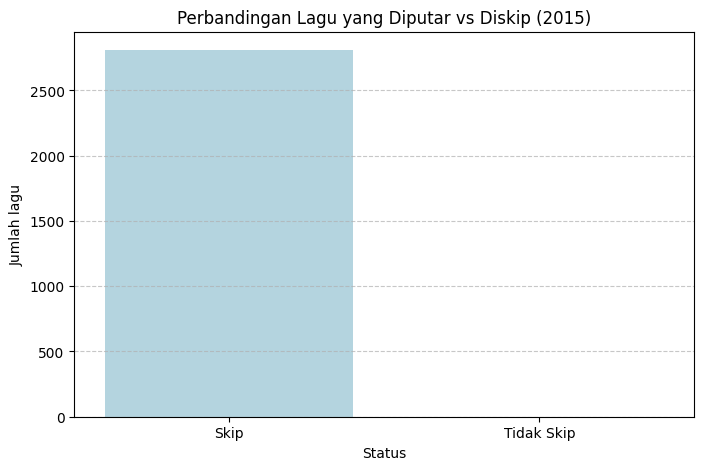

In [45]:
#Visualisasi skip rate
skip_data = pd.DataFrame({
    'Status': ['Skip', 'Tidak Skip'],
    'Jumlah': [total_play, total_skip - total_skip]
})

#Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(x='Status', y='Jumlah', data=skip_data, palette=['lightblue', 'salmon'])

#Tambahkan judul & label
plt.title('Perbandingan Lagu yang Diputar vs Diskip (2015)')
plt.ylabel("Jumlah lagu")
plt.grid(axis="y", linestyle='--', alpha=0.7)

#Tampilkan grafik
plt.show()

**Potensi Insight**
*   Pengguna sedang mencari lagu tertentu, jadi banyak yang dilewati
*   Pengguna sering memainkan playlist dengan shuffle, lalu skip lagu yang kurang disukai

<ipython-input-46-bc3fb06b6aa8>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=years, y=percent_skipped, palette=['gray', 'lightgray', 'royalblue'])


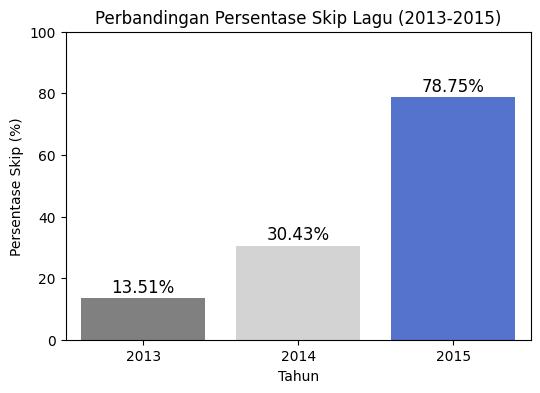

In [46]:
# Filter data per tahun
df_2015 = df[df['ts'].dt.year == 2015]
df_2014 = df[df['ts'].dt.year == 2014]
df_2013 = df[df['ts'].dt.year == 2013]

# Hitung jumlah total pemutaran dan skip per tahun
def hitung_skip(df):
    total = len(df)
    skip = df['skipped'].sum()
    return (skip / total) * 100 if total > 0 else 0

percent_skip_2015 = hitung_skip(df_2015)
percent_skip_2014 = hitung_skip(df_2014)
percent_skip_2013 = hitung_skip(df_2013)

# Buat data untuk plotting
years = ['2013', '2014', '2015']
percent_skipped = [percent_skip_2013, percent_skip_2014, percent_skip_2015]

# Plot perbandingan
plt.figure(figsize=(6,4))
sns.barplot(x=years, y=percent_skipped, palette=['gray', 'lightgray', 'royalblue'])

# Tambahkan label
plt.title("Perbandingan Persentase Skip Lagu (2013-2015)")
plt.xlabel("Tahun")
plt.ylabel("Persentase Skip (%)")
plt.ylim(0, 100)

# Tampilkan nilai di atas bar
for i, v in enumerate(percent_skipped):
    plt.text(i, v + 2, f"{v:.2f}%", ha="center", fontsize=12)

plt.show()


****Beberapa kemungkinan penyebab****
* Adanya perubahan kebiasaan pengguna seperti lebih picky dan suka skip lagu yang kurang menarik
* Adanya fitur baru di spotify seperti auto-shuffle play, atau rekoemndasi yang kurang sesuai
* Adanya perubahan preferensi genre musik

****Analisis apakah skip lebih banyak terjadi di lagu-lagu baru atau yang sudah sering diputar****

***Kalo lagu yang sering diputar lebih jarang di-skip, berarti mereka cenderung menyukai lagu tsb. Sebaliknya, kalau lagu yang jarang diputar malah lebih sering diskip, bisa jadi itu lagu yang kurang disukai***

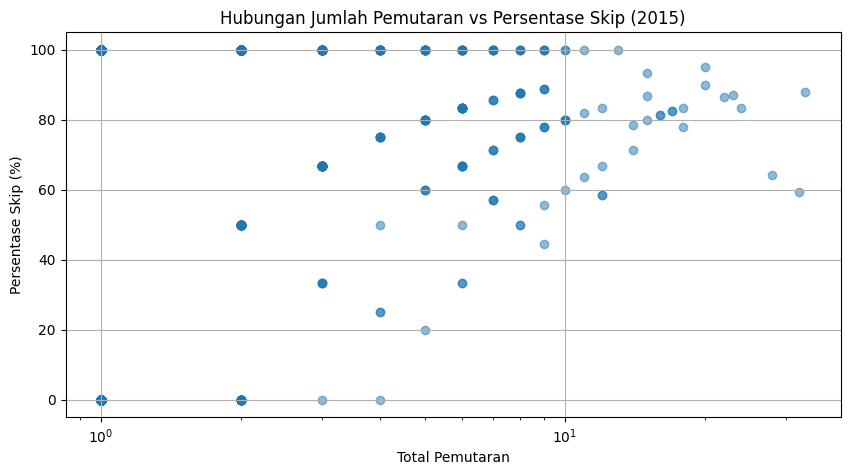

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

#Kelompokkan lagu berdasarkan total jumlah pemutarannya
stats_lagu = df_2015.groupby('track_name').agg({
    'skipped': ['sum', 'count']
}).reset_index()

# Rename the columns for better readability
stats_lagu.columns = ['track_name', 'total_skip', 'total_play']  # Rename columns

#Hitung persentase skip
stats_lagu['skip_rate'] = (stats_lagu['total_skip'] / stats_lagu['total_play']) * 100

#Scatterplot untuk jumlah pemutaran vs persentase skip
plt.figure(figsize=(10, 5))
plt.scatter(stats_lagu['total_play'], stats_lagu['skip_rate'], alpha=0.5)
plt.xlabel('Total Pemutaran')
plt.ylabel('Persentase Skip (%)')
plt.title('Hubungan Jumlah Pemutaran vs Persentase Skip (2015)')
plt.xscale('log')  # Gunakan log scale agar lebih jelas
plt.grid(True)
plt.show()

* Lagu dengan sedikit pemutaran (di sisi kiri grafik) cenderung punya persentase skip yang sangat tinggi. Ini bisa berarti banyak lagu baru yang dicoba tapi langsung di-skip
* Lagu dengan pemutaran lebih banyak (di sisi kanan grafik) masih ada yang di-skip, tapi beberapa memiliki persentase skip yang lebih rendah. Ini menunjukkan bahwa lagu yang sering diputar kemungkinan lebih disukai
* Ada beberapa titik di bagian atas dengan persentase skip 100*--mungkin itu lagu yang dicoba sekali lalu langsung di-skip setiap kali

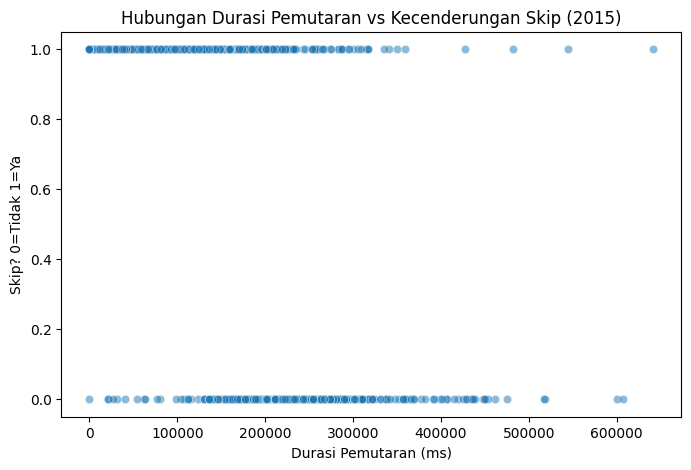

In [48]:
#scatter plot ms_played vs skipped
#untuk melihat apakah ada hubungan antara durasi pemutaran dan kecenderungan skip

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_2015, x='ms_played', y='skipped', alpha=0.5)
plt.xlabel('Durasi Pemutaran (ms)')
plt.ylabel('Skip? 0=Tidak 1=Ya')
plt.title('Hubungan Durasi Pemutaran vs Kecenderungan Skip (2015)')
plt.show()

📌 Pola Skip vs Durasi Pemutaran:

* Ada dua garis horizontal yang menunjukkan lagu di-skip (skipped = 1) atau tidak (skipped = 0).
* Sebagian besar lagu yang diputar lebih lama cenderung tidak di-skip (nilai 0).
* Lagu dengan durasi pemutaran pendek lebih sering di-skip.

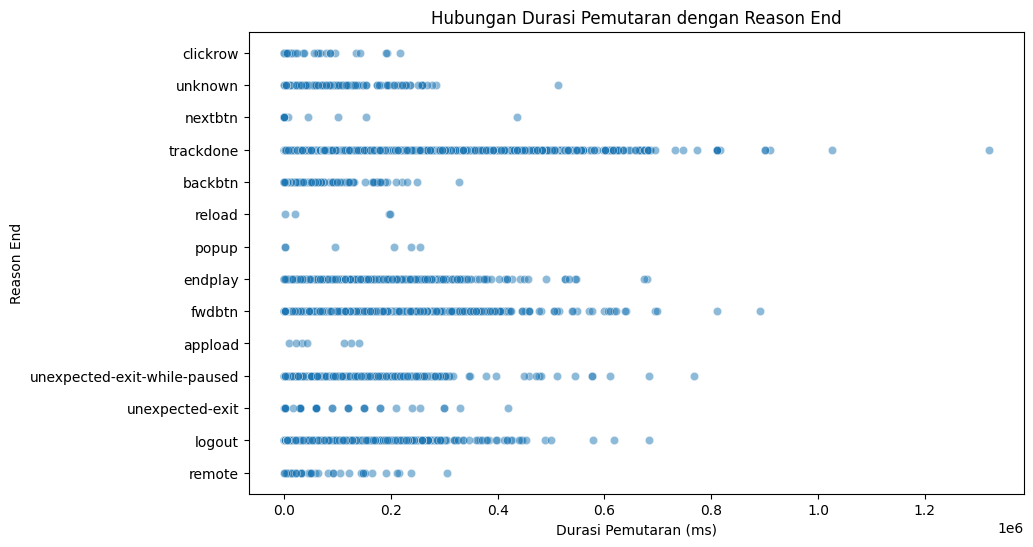

In [28]:
# scatter plot durasi pemutaran vs reason_end
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="ms_played", y="reason_end", alpha=0.5)

plt.xlabel("Durasi Pemutaran (ms)")
plt.ylabel("Reason End")
plt.title("Hubungan Durasi Pemutaran dengan Reason End")
plt.show()


Sebaran Reason End

* Alasan "trackdone" memiliki banyak titik tersebar di berbagai durasi, yang berarti banyak lagu diputar sampai selesai.
* Alasan "endplay" juga cukup banyak, kemungkinan karena pengguna membiarkan lagu selesai dimainkan.
* Alasan "unexpected-exit" atau "logout" muncul di berbagai durasi, mungkin karena pengguna keluar dari aplikasi atau ada crash.

Durasi Pemutaran vs. Reason End

* Lagu dengan durasi pendek lebih sering diakhiri oleh alasan seperti "backbtn", "fwdbtn", atau "popup", yang bisa berarti pengguna aktif mengganti lagu sebelum selesai.
* Lagu dengan durasi panjang lebih sering berakhir dengan "trackdone", artinya semakin lama lagu diputar, semakin besar kemungkinan lagu didengarkan sampai habis.
* Ada beberapa outlier (titik yang jauh di kanan), yang menunjukkan bahwa ada lagu dengan durasi sangat panjang sebelum akhirnya berhenti karena alasan tertentu.

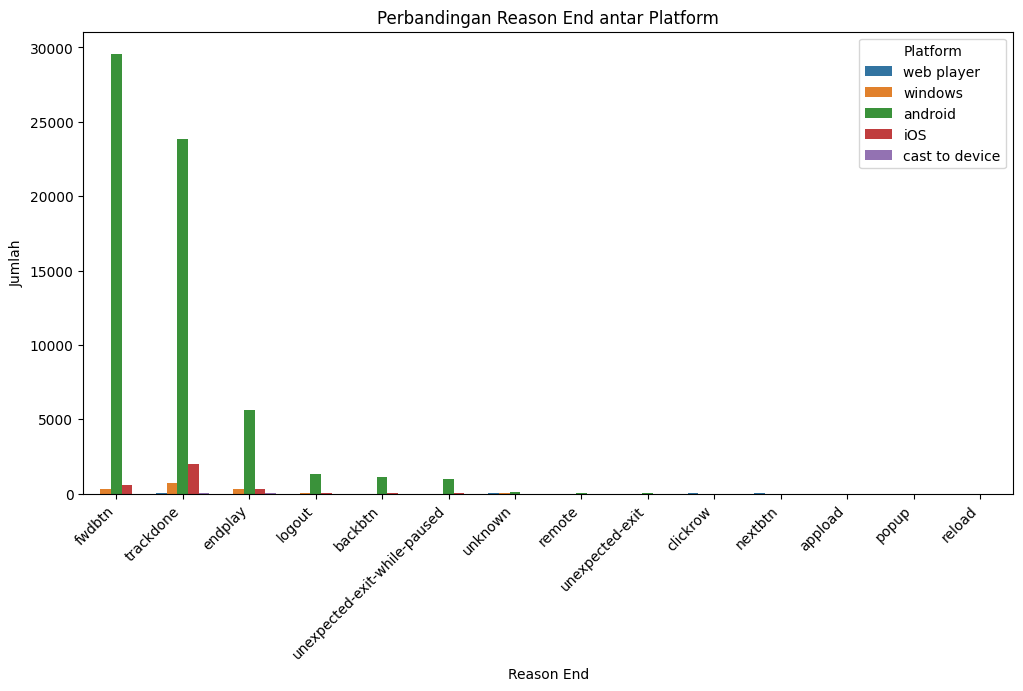

In [29]:
# Plot Perbandingan Reason End antar Platform
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="reason_end", hue="platform", order=df["reason_end"].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Reason End")
plt.ylabel("Jumlah")
plt.title("Perbandingan Reason End antar Platform")
plt.legend(title="Platform")
plt.show()


****Dominasi Android****
* Android mendominasi jumlah reason end, terutama pada trackdone dan fwdbtn
* Sebagian besar pengguna berasal dari android/pengguna android lebih sering menyelesaikan atau berpindah track

****Pola Skip & Engagement****
* trackdone dan fwdbtn memliki angka yang sangat tinggi di Android dibandingkan platform lain.
  * trackdone berarti pengguna menyelesaikan track hingga akhir
  * fwdbtn menunjukkan pengguna sering melewati bagian tertentu
  * Jika jumlah fwdbtn sangat tinggi dibanding trackdone, bisa jadi banyak pengguna yang melakukan skip sebelum lagu selesai.

****Kesimpulan****
* Android adalah platform dengan jumlah interaksi terbanyak, baik untuk menyelesaikan maupun skip track.
* Skip rate lebih tinggi di Android dibanding platform lain (karena fwdbtn cukup tinggi)
* Engagement lebih baik di beberapa platform lain seperti web player & iOS (karena lebih banyak trackdone dibanding skip)